## The brief
Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).
## Context 
This is my first kaggle competition submission in which I used NLP techniques and evaluated the models on the F1 score.

I submitted the the predictions with the best F1 score.


**Loading and exploring the dataset**

In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_colwidth', 100)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/train.csv


In [101]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [102]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


Test_df has no target and the predictions will be made using this data.

In [103]:

test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [104]:
test_df.shape

(3263, 4)

In [105]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [106]:
test_df.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

Given the nature of this project, I will only focus and use the posts (column = "text") as feauture, therefore I won't do anything to the "keyword" and "location" columns.

Let's check if the train dataset has a similar number of different targets (real disasters vs fake disasters)

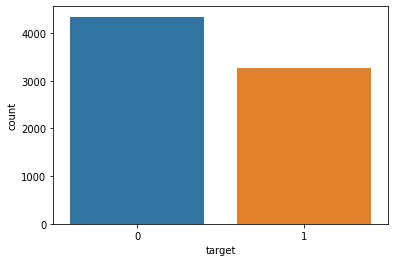

In [107]:
import seaborn as sns
sns.countplot(x= "target", data = train_df)

There are approximately 1000 more "real distaster" tweets

## Pre processing text data

1. remove punctuation and other non characters
2. tokenization
3. remove stopwords
4. lemmatize
5. vectorizing



**Cleaning the text**

In [112]:
import string
import nltk
import re
stopwords = nltk.corpus.stopwords.words("english")

def clean_text(text):
    """function to remove punctuation and other non-characters, tokenize and remove stopwords"""
    text = re.sub(r'http\S+', '', text)
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

    

In [113]:
# applying function to both datasets

train_df["clean_text"] = train_df["text"].apply(lambda x: clean_text(x.lower()))
test_df["clean_text"] = test_df["text"].apply(lambda x: clean_text(x.lower()))


In [114]:
train_df["clean_text"].head()

0                                                   [deeds, reason, earthquake, may, allah, forgive, us]
1                                                          [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, officers, evacuation, shelter, place, orders, expec...
3                                  [13000, people, receive, wildfires, evacuation, orders, california, ]
4                                    [got, sent, photo, ruby, alaska, smoke, wildfires, pours, school, ]
Name: clean_text, dtype: object

**Lemmatizing**

In [115]:
# lemmatizing

from nltk.stem import WordNetLemmatizer 

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text])


train_df["lemmatized"] = train_df["clean_text"].apply(lambda x:  lemmatize_text(x) )
test_df["lemmatized"] = test_df["clean_text"].apply(lambda x:  lemmatize_text(x) )

In [116]:
train_df.head()

,id,keyword,location,text,target,len,clean_text,lemmatized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,57,"[deeds, reason, earthquake, may, allah, forgive, us]",deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,"[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,1,112,"[residents, asked, shelter, place, notified, officers, evacuation, shelter, place, orders, expec...",resident asked shelter place notified officer evacuation shelter place order expected
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,57,"[13000, people, receive, wildfires, evacuation, orders, california, ]",13000 people receive wildfire evacuation order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,72,"[got, sent, photo, ruby, alaska, smoke, wildfires, pours, school, ]",got sent photo ruby alaska smoke wildfire pours school


**Vectorizing**


In [117]:
from sklearn.feature_extraction.text import CountVectorizer# as a parameter you can also add a function that cleans and stems/lemmatizes 
# so it doesn't need to be done in two different steps. parameter is "analyzer"

cv1 = CountVectorizer()
cv2 = CountVectorizer()
train_counts = cv1.fit_transform(train_df["lemmatized"]).todense()
test_counts = cv2.fit_transform(test_df["lemmatized"]).todense()


## Training Models

Splitting into train and test

In [118]:
from sklearn.model_selection import train_test_split

X = train_counts
y = train_df["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Naives Bayes

In [120]:
from sklearn.naive_bayes import GaussianNB

In [121]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting test set results
y_pred_NB = classifier.predict(X_test)
y_pred_NB

array([1, 1, 1, ..., 1, 0, 1])

In [122]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(y_test, y_pred_NB) 
cm_NB

TN_NB = cm_NB[0,0] # True Negatives
FN_NB = cm_NB[0,1] # False Negatives
FP_NB = cm_NB[1,0] # False Positives
TP_NB = cm_NB[1,1] # True Positives

accuracy_NB = (TP_NB + TN_NB) / (TP_NB + TN_NB + FP_NB + FN_NB) 
precision_NB = TP_NB / (TP_NB + FP_NB)
recall_NB = TP_NB / (TP_NB + FN_NB)
F1_score_NB = 2 * precision_NB * recall_NB / (precision_NB + recall_NB)


print("Accuracy of NB model is" , round(accuracy_NB, 3) , "\n",
     "Precision of NB model is", round(precision_NB,3) , "\n",
      "Recall of NB model is", round(recall_NB, 3), "\n",
      "F1 score of NB model is", round(F1_score_NB,3)
      
     )

Accuracy of NB model is 0.616 
 Precision of NB model is 0.805 
 Recall of NB model is 0.527 
 F1 score of NB model is 0.637


### Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)
# predicting
y_pred_DT = classifier.predict(X_test)

In [125]:
# confusion matrix
cm_DT = confusion_matrix(y_test, y_pred_DT)
cm_DT

array([[740, 146],
       [207, 430]])

In [126]:
TN_DT = cm_DT[0,0]
FN_DT = cm_DT[0,1]
FP_DT = cm_DT[1,0]
TP_DT = cm_DT[1,1]

accuracy_DT = (TP_DT + TN_DT) / (TP_DT + TN_DT + FP_DT + FN_DT) 
precision_DT = TP_DT / (TP_DT + FP_DT)
recall_DT = TP_DT / (TP_DT + FN_DT)
F1_score_DT= 2 * precision_DT * recall_DT / (precision_DT + recall_DT)


print("Accuracy of DT model is" , round(accuracy_DT, 3) , "\n",
     "Precision of DT model is", round(precision_DT,3) , "\n",
      "Recall of DT model is", round(recall_DT, 3), "\n",
      "F1 score of DT model is", round(F1_score_DT,3)
      
     )

Accuracy of DT model is 0.768 
 Precision of DT model is 0.675 
 Recall of DT model is 0.747 
 F1 score of DT model is 0.709


### Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
classifier = RandomForestClassifier(n_estimators = 300, criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [129]:
y_pred_RF = classifier.predict(X_test)
y_pred_RF

array([0, 1, 1, ..., 1, 0, 0])

In [130]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
cm_RF

array([[808,  78],
       [230, 407]])

In [131]:
TN_RF = cm_RF[0,0]
FN_RF = cm_RF[0,1]
FP_RF = cm_RF[1,0]
TP_RF = cm_RF[1,1]

accuracy_RF = (TP_RF + TN_RF) / (TP_RF + TN_RF + FP_RF + FN_RF) 
precision_RF = TP_RF / (TP_RF + FP_RF)
recall_RF = TP_RF / (TP_RF + FN_RF)
F1_score_RF= 2 * precision_RF * recall_RF / (precision_RF + recall_RF)


print("Accuracy of DT model is" , round(accuracy_RF, 3) , "\n",
     "Precision of DT model is", round(precision_RF,3) , "\n",
      "Recall of DT model is", round(recall_RF, 3), "\n",
      "F1 score of DT model is", round(F1_score_RF,3)
      
     )

Accuracy of DT model is 0.798 
 Precision of DT model is 0.639 
 Recall of DT model is 0.839 
 F1 score of DT model is 0.725


### Comparing the models


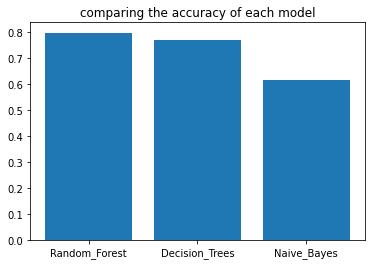

In [133]:
Accuracy = [accuracy_RF, accuracy_DT, accuracy_NB]
Methods = ["Random_Forest", "Decision_Trees", "Naive_Bayes"]
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title("comparing the accuracy of each model")
plt.show()

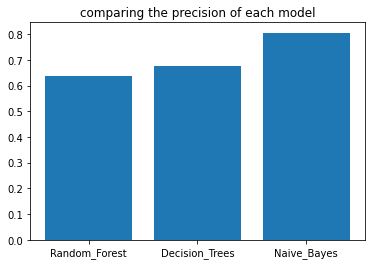

In [134]:
Precision = [precision_RF, precision_DT, precision_NB]
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title("comparing the precision of each model")
plt.show()

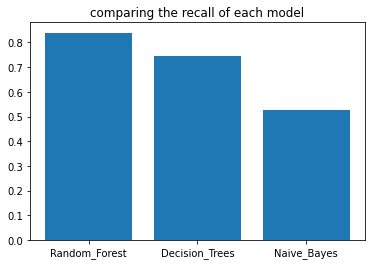

In [135]:
Recall = [recall_RF, recall_DT, recall_NB]
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title("comparing the recall of each model")
plt.show()

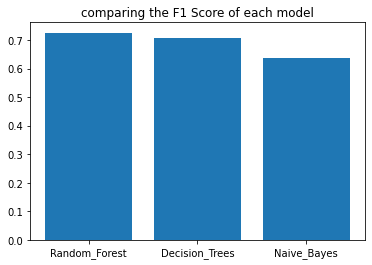

In [136]:
F1_Score = [F1_score_RF, F1_score_DT, F1_score_NB]
F1_Score_pos = np.arange(len(Methods))
plt.bar(F1_Score_pos, F1_Score)
plt.xticks(F1_Score_pos, Methods)
plt.title("comparing the F1 Score of each model")
plt.show()

### Choosing model and predicting on test_df
Random Forest is the model with the highest F1 score

In [149]:
X_testset=cv1.transform(test_df['lemmatized']).todense()
classifier = RandomForestClassifier(n_estimators = 300, criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

prediction_RF = classifier.predict(X_testset)
prediction_RF

array([1, 1, 1, ..., 1, 1, 0])

In [178]:
# Submitting results
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

In [179]:
sample_submission["target"] = prediction_RF

In [180]:
sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [181]:
sample_submission.to_csv("submission.csv", index=False)